In [6]:
import pandas as pd

df=pd.read_csv("children_malnutrition.csv")
df.head()

,age_months,weight_kg,height_cm,muac_cm,bmi,nutrition_status
0,12.345052,3.000000,54.134002,13.160919,10.0,normal
1,30.807200,5.459076,76.199180,13.944380,10.0,normal
2,15.723226,3.000000,60.280820,13.243565,10.0,normal
3,57.796256,10.103074,104.990471,14.105683,10.0,normal
4,40.321320,7.110583,85.277902,14.641630,10.0,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_months        5000 non-null   float64
 1   weight_kg         5000 non-null   float64
 2   height_cm         5000 non-null   float64
 3   muac_cm           5000 non-null   float64
 4   bmi               5000 non-null   float64
 5   nutrition_status  5000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 234.5+ KB


In [4]:
df.columns

Index(['age_months', 'weight_kg', 'height_cm', 'muac_cm', 'bmi',
       'nutrition_status'],
      dtype='object')

In [5]:
df["nutrition_status"].value_counts()

nutrition_status
normal      3550
moderate    1100
severe       350
Name: count, dtype: int64

In [7]:
x=df.drop("nutrition_status",axis=1)
y=df["nutrition_status"]
x.head()

,age_months,weight_kg,height_cm,muac_cm,bmi
0,12.345052,3.000000,54.134002,13.160919,10.0
1,30.807200,5.459076,76.199180,13.944380,10.0
2,15.723226,3.000000,60.280820,13.243565,10.0
3,57.796256,10.103074,104.990471,14.105683,10.0
4,40.321320,7.110583,85.277902,14.641630,10.0


In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_encoded=le.fit_transform(y)
print(le.classes_)

['moderate' 'normal' 'severe']


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(
    x, y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

print("Training samples:", x_train.shape[0])
print("Testing samples:", x_test.shape[0])

Training samples: 4000
Testing samples: 1000


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
from sklearn.metrics import accuracy_score

y_pred=rf_model.predict(x_test)

accuracy=accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.947


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    moderate       0.89      0.86      0.88       220
      normal       0.98      0.99      0.98       710
      severe       0.80      0.79      0.79        70

    accuracy                           0.95      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.95      0.95      0.95      1000



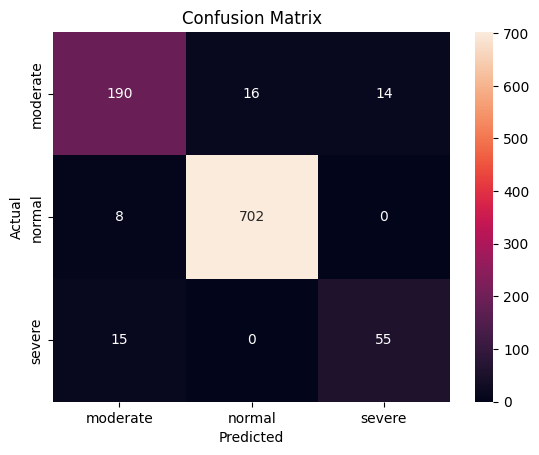

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", 
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

      Feature  Importance
3     muac_cm    0.622017
0  age_months    0.168098
1   weight_kg    0.109536
2   height_cm    0.098984
4         bmi    0.001366


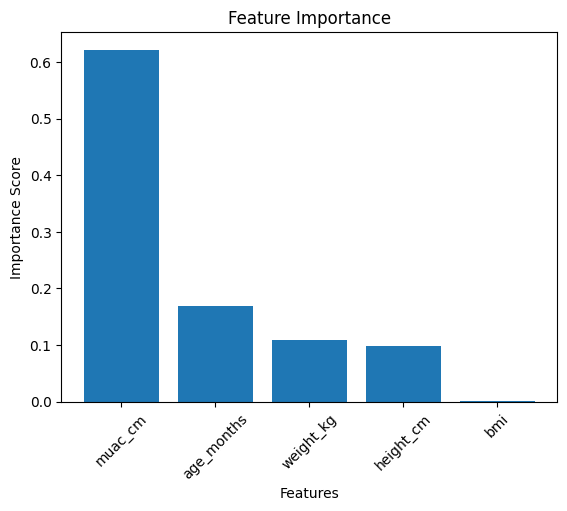

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances=rf_model.feature_importances_
features = x.columns

importance_df=pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
})

importance_df=importance_df.sort_values(by="Importance", ascending=False)

print(importance_df)

plt.figure()
plt.bar(importance_df["Feature"], importance_df["Importance"])
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()